## Linear Regression with TensorFlow and PyTorch

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time

In [2]:
import pickle
with open('mfr_data.pkl', 'rb') as handle:
    info = pickle.load(handle)
data,test,train,ds,s = info
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'mfr_data.pkl'

In [3]:
# Split data/labels
data_X = np.array(data['H2R'])
data_Y = np.array(data['lnMFR'])

![exercise](https://apmonitor.com/che263/uploads/Begin_Python/exercise.png)

### Tensorflow Linear Regression

TensorFlow is known for Deep Learning. This tutorial shows how to use TensorFlow for a simple linear regression. There are better packages for linear regression. Also, Keras is an interface to TensorFlow that simplifies the model building, regression solution, and deployment.

In [4]:
display_step = 100
learning_rate = 0.01
epochs = 1000

$$y=wx+b$$


In [5]:
# Weight and Bias
w = tf.Variable(tf.zeros(1), name='weight')
b = tf.Variable(tf.zeros(1), name='bias')

def predict(x):
    return x * w + b

def mse(y_true, y_pred):
    return tf.losses.mean_squared_error(y_true,y_pred)

# SGD Optimizer
optimizer = tf.optimizers.SGD(learning_rate=learning_rate)

In [6]:
history = []
start = time.time()

# Start training
for epoch in range(1, epochs + 1):
    
    # Begin GradientTape and optimise
    with tf.GradientTape() as g:
        pred = predict(data_X)
        loss = mse(data_Y, pred)

    # Compute dw, db
    gradients = g.gradient(loss, [w,b])
    
    # Update w and b
    optimizer.apply_gradients(zip(gradients, [w,b]))
    
    # Monitor training / display steps
    if epoch % display_step == 0:
        pred = predict(data_X)
        loss = mse(pred, data_Y)
        history.append(np.array(w * data_X + b))
        print("Epoch: %i, Loss: %f, w: %f, b: %f" % (epoch, loss, w.numpy(), b.numpy()))
print('Train Time: %f seconds' %(time.time() - start))

Epoch: 100, Loss: 0.439586, w: 0.329762, b: 1.587143
Epoch: 200, Loss: 0.385072, w: 0.400645, b: 1.777894
Epoch: 300, Loss: 0.383056, w: 0.439227, b: 1.795969
Epoch: 400, Loss: 0.381866, w: 0.473535, b: 1.792737
Epoch: 500, Loss: 0.380709, w: 0.507041, b: 1.786919
Epoch: 600, Loss: 0.379574, w: 0.540175, b: 1.780833
Epoch: 700, Loss: 0.378460, w: 0.572994, b: 1.774761
Epoch: 800, Loss: 0.377367, w: 0.605506, b: 1.768742
Epoch: 900, Loss: 0.376294, w: 0.637717, b: 1.762778
Epoch: 1000, Loss: 0.375241, w: 0.669629, b: 1.756870
Train Time: 1.487466 seconds


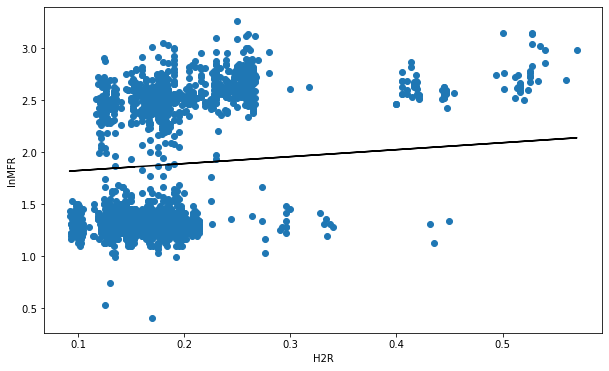

In [7]:
fig = plt.figure(figsize=(10,6))

plt.scatter(data_X,data_Y, label="Data")
# for i in range(len(history)):
#     plt.plot(data_X,history[i], c='k',label=str((i+1)*display_step)+" epoch", alpha = (i+1)/(i+5))
plt.plot(data_X,history[-1],'k')
plt.xlabel('H2R')
plt.ylabel('lnMFR')
plt.show()

![exercise](https://apmonitor.com/che263/uploads/Begin_Python/exercise.png)

### Pytorch Linear Regression

PyTorch is best known for nonlinear regression such as with Deep Learning. This tutorial shows how to use PyTorch for a simple linear regression. There are better packages for linear regression. See also [Numpy vs PyTorch: Linear Regression from scratch](https://medium.com/analytics-vidhya/numpy-vs-pytorch-linear-regression-from-scratch-452a121fb0e8).

In [8]:
data_X = data_X.reshape(len(data_X),1)
data_Y = data_Y.reshape(len(data_Y),1)

In [9]:
import torch
from torch.autograd import Variable
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [10]:
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
epochs = 100

model = linearRegression(inputDim, outputDim)

In [11]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [12]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    inputs = Variable(torch.from_numpy(data_X).float())
    labels = Variable(torch.from_numpy(data_Y).float())

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

#     print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(4.0090, grad_fn=<MseLossBackward>)
tensor(3.8619, grad_fn=<MseLossBackward>)
tensor(3.7209, grad_fn=<MseLossBackward>)
tensor(3.5856, grad_fn=<MseLossBackward>)
tensor(3.4558, grad_fn=<MseLossBackward>)
tensor(3.3314, grad_fn=<MseLossBackward>)
tensor(3.2120, grad_fn=<MseLossBackward>)
tensor(3.0976, grad_fn=<MseLossBackward>)
tensor(2.9878, grad_fn=<MseLossBackward>)
tensor(2.8825, grad_fn=<MseLossBackward>)
tensor(2.7816, grad_fn=<MseLossBackward>)
tensor(2.6847, grad_fn=<MseLossBackward>)
tensor(2.5918, grad_fn=<MseLossBackward>)
tensor(2.5028, grad_fn=<MseLossBackward>)
tensor(2.4173, grad_fn=<MseLossBackward>)
tensor(2.3354, grad_fn=<MseLossBackward>)
tensor(2.2568, grad_fn=<MseLossBackward>)
tensor(2.1815, grad_fn=<MseLossBackward>)
tensor(2.1092, grad_fn=<MseLossBackward>)
tensor(2.0399, grad_fn=<MseLossBackward>)
tensor(1.9734, grad_fn=<MseLossBackward>)
tensor(1.9096, grad_fn=<MseLossBackward>)
tensor(1.8485, grad_fn=<MseLossBackward>)
tensor(1.7898, grad_fn=<MseLossBac

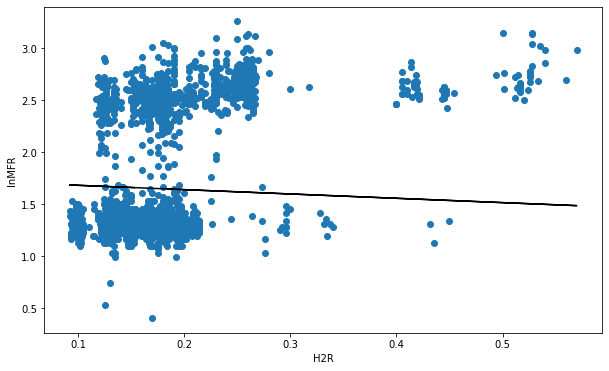

In [13]:
with torch.no_grad(): # we don't need gradients in the testing phase
    predicted = model(Variable(torch.from_numpy(data_X).float())).data.numpy()
#     print(predicted)

fig = plt.figure(figsize=(10,6))
plt.scatter(data_X, data_Y)
plt.plot(data_X, predicted, 'k')
plt.xlabel('H2R')
plt.ylabel('lnMFR')
plt.show()